<a href="https://colab.research.google.com/github/mytreasury/Global_Terrorism_EDA_Project/blob/main/Mobile_price_range_prediction_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost)


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [ ]:
# Load Dataset

Mobile_data = pd.read_csv("/content/data_mobile_price_range.csv")


### Dataset First View

In [ ]:
# Dataset First Look
Mobile_data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
Mobile_data.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
len(Mobile_data.columns)


21

In [ ]:
#bootom 5 rows
Mobile_data.tail()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Data Analysis


In [ ]:
# Dataset Info
Mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#Description of the data
Mobile_data.describe()
Mobile_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
# Total phones with sc_w = 0
print(len(Mobile_data[Mobile_data.sc_w == 0]))
# Total phones with px_height = 0
print(len(Mobile_data[Mobile_data.px_height == 0]))
 

180
2


In [ ]:
#where ther is sc_W and px_height is zero ,assigning mean values
Mobile_data['sc_w'][Mobile_data[Mobile_data.sc_w == 0].index] = Mobile_data.sc_w.mean()
Mobile_data['px_height'][Mobile_data[Mobile_data.px_height == 0].index] = Mobile_data.px_height.mean()
 

In [ ]:
#checking whether there is duplicates or not
len(Mobile_data[Mobile_data.duplicated()])


0

there are no duplicate values



In [ ]:
#The nunique () method returns the number of unique values for each column
Mobile_data.nunique()


battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
#checking whether there is null values or not
Mobile_data.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

there are no missing values in the data set



###Exploratory Data Analysis

price


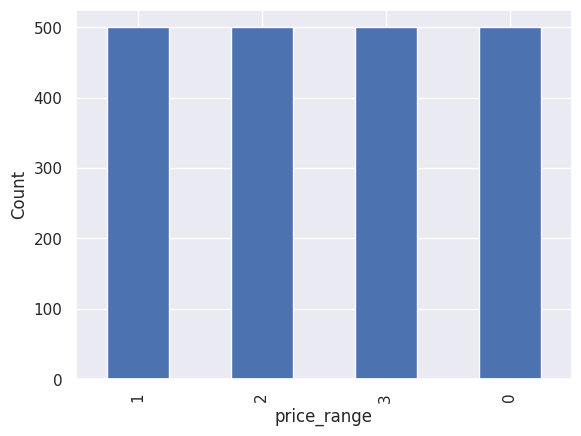

In [ ]:
#classes
sns.set()
price_plot=Mobile_data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()


there are mobile phones in 4 price ranges. The number of elements is almost similar.



###Battery power

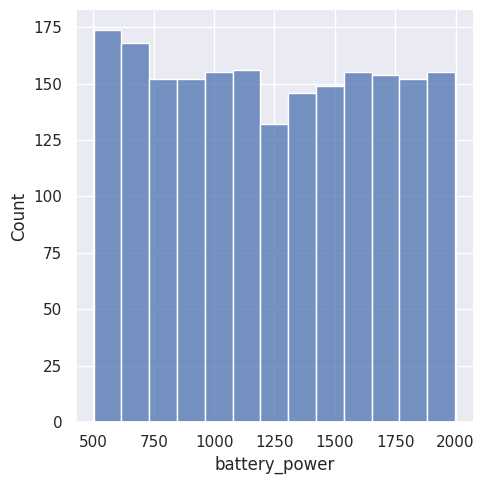

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(Mobile_data["battery_power"])
plt.show()
   

this plot shows how the battery mAh is spread. there is a gradual increase as the price range increases



##Bluetooth

<Axes: xlabel='blue', ylabel='price_range'>

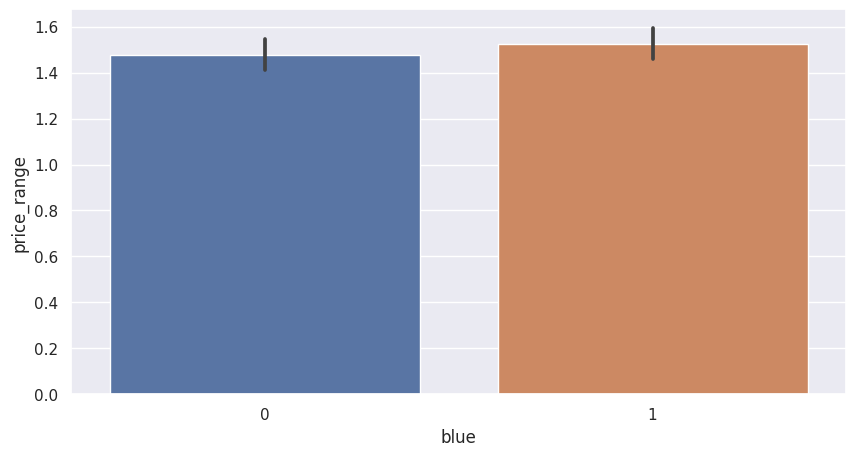

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=Mobile_data,x='blue',y='price_range',ax=ax)


half the devices have Bluetooth, and half don’t.

##Ram

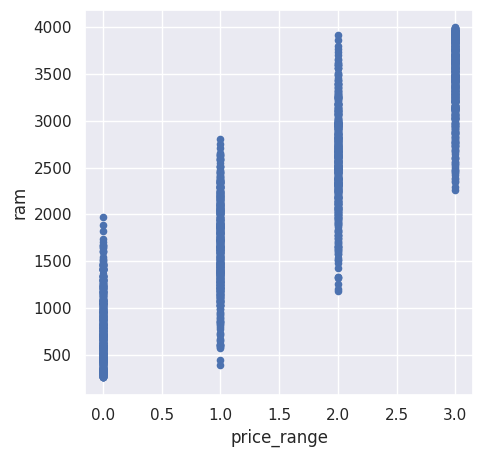

In [ ]:
Mobile_data.plot(x='price_range',y='ram',kind='scatter')
plt.show()
  

Ram has continuous increase with price range while moving from Low cost to Very high cost

##pixel_width



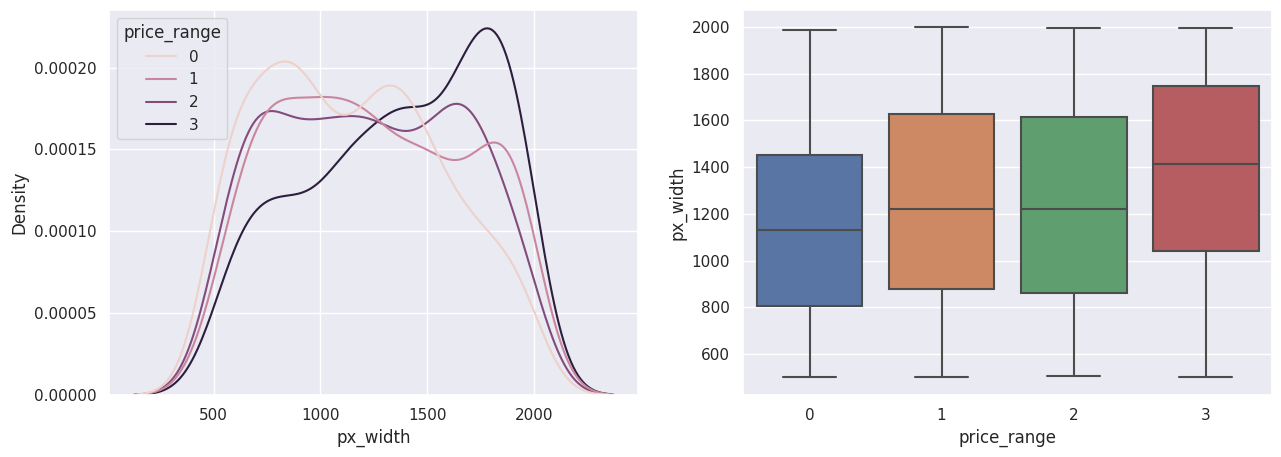

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=Mobile_data, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=Mobile_data, x='price_range', y='px_width', ax=axs[1])
plt.show()
   

There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.



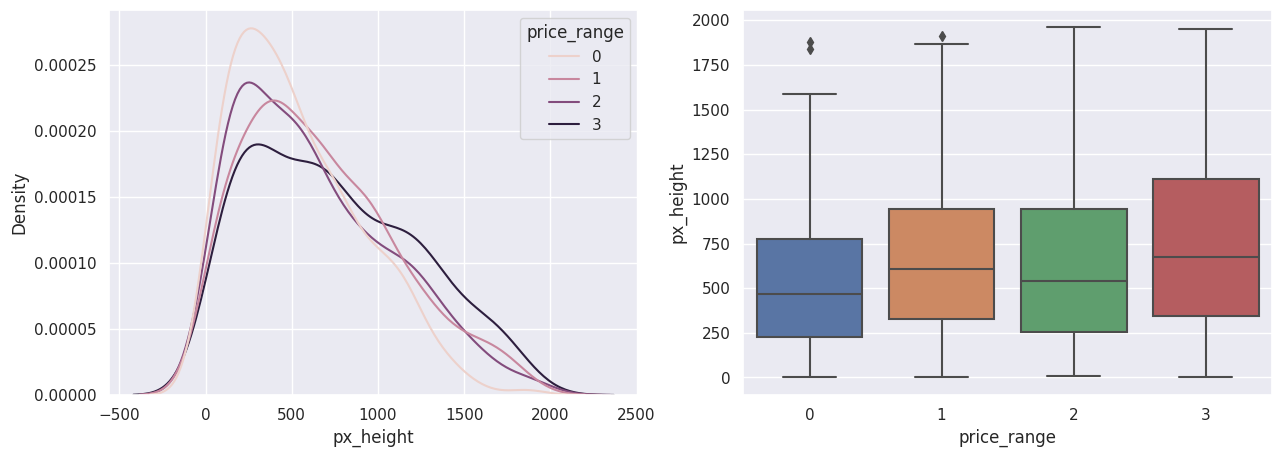

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=Mobile_data, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=Mobile_data, x='price_range', y='px_height', ax=axs[1])
plt.show()
   

Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height

##FC (front camera megapixels)



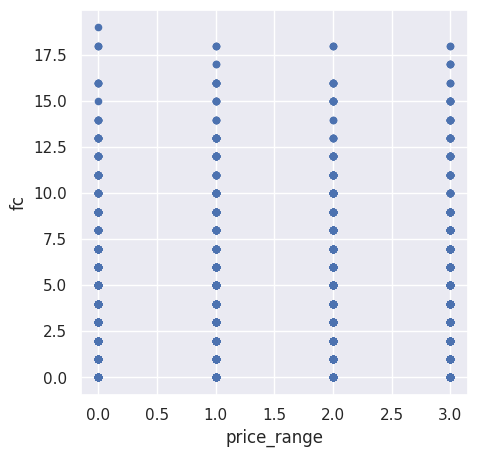

In [ ]:
Mobile_data.plot(x='price_range',y='fc',kind='scatter')
plt.show()
  

This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions

###PC (Primary camera Megapixels)

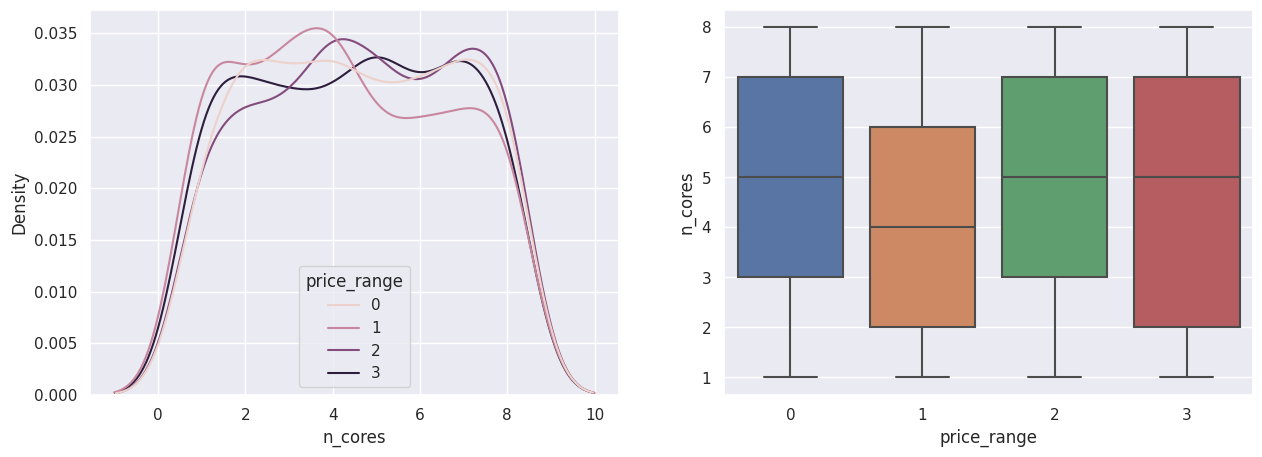

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=Mobile_data, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=Mobile_data, x='price_range', y='n_cores', ax=axs[1])
plt.show()
   

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

###Mobile weight



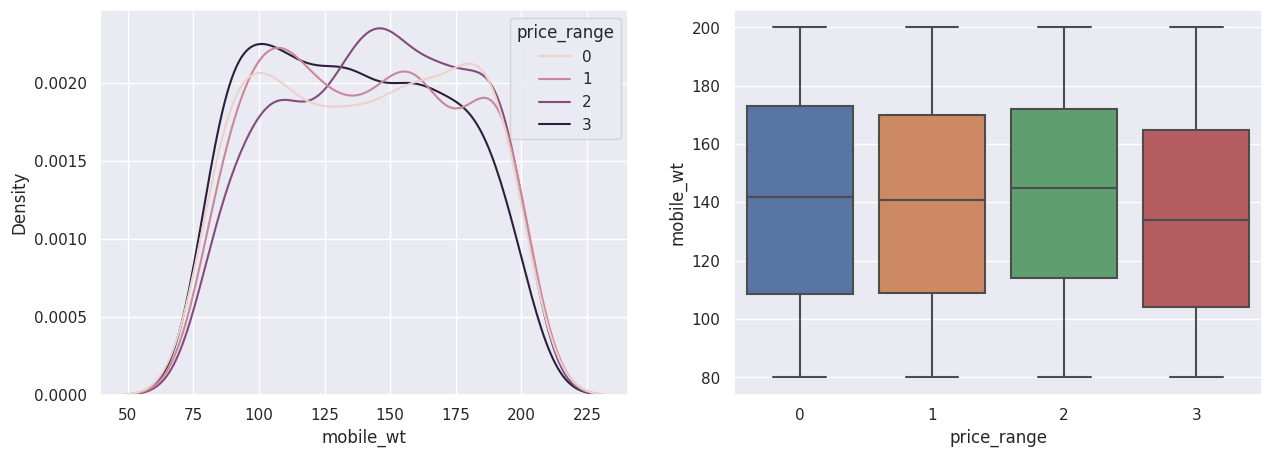

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=Mobile_data, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=Mobile_data, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()


costly phones are lighter

##screen_size

Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.



In [ ]:
# Defining new variable sc_size

Mobile_data['sc_size'] = np.sqrt((Mobile_data['sc_h']**2) + (Mobile_data['sc_w']**2))
Mobile_data['sc_size'] = round(Mobile_data['sc_size']/2.54, 2)


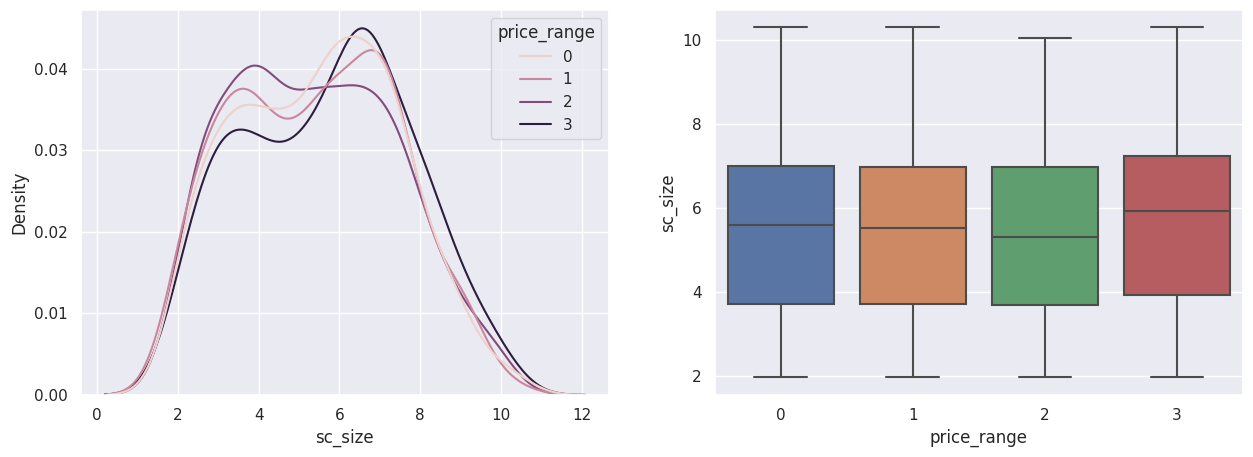

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=Mobile_data, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=Mobile_data, x='price_range', y='sc_size', ax=axs[1])
plt.show()


Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.

In [ ]:
# Let's drop sc_h and s_w

Mobile_data.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)


In [ ]:
binary_features = [ 'four_g', 'three_g']


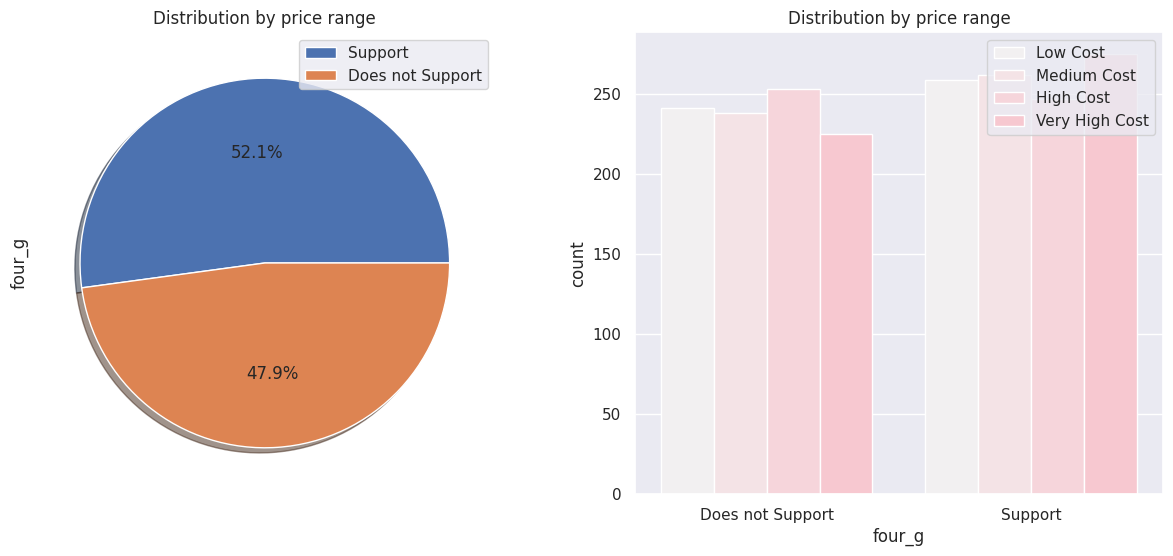

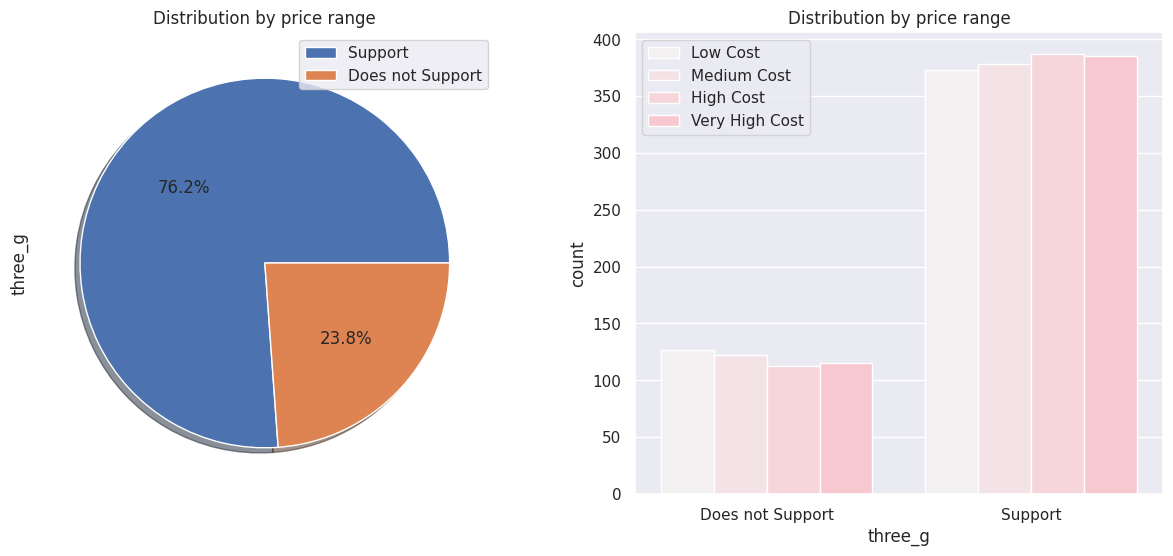

In [ ]:
# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  Mobile_data[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = Mobile_data, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])
 

feature 'three_g' play an important feature in prediction



<Axes: >

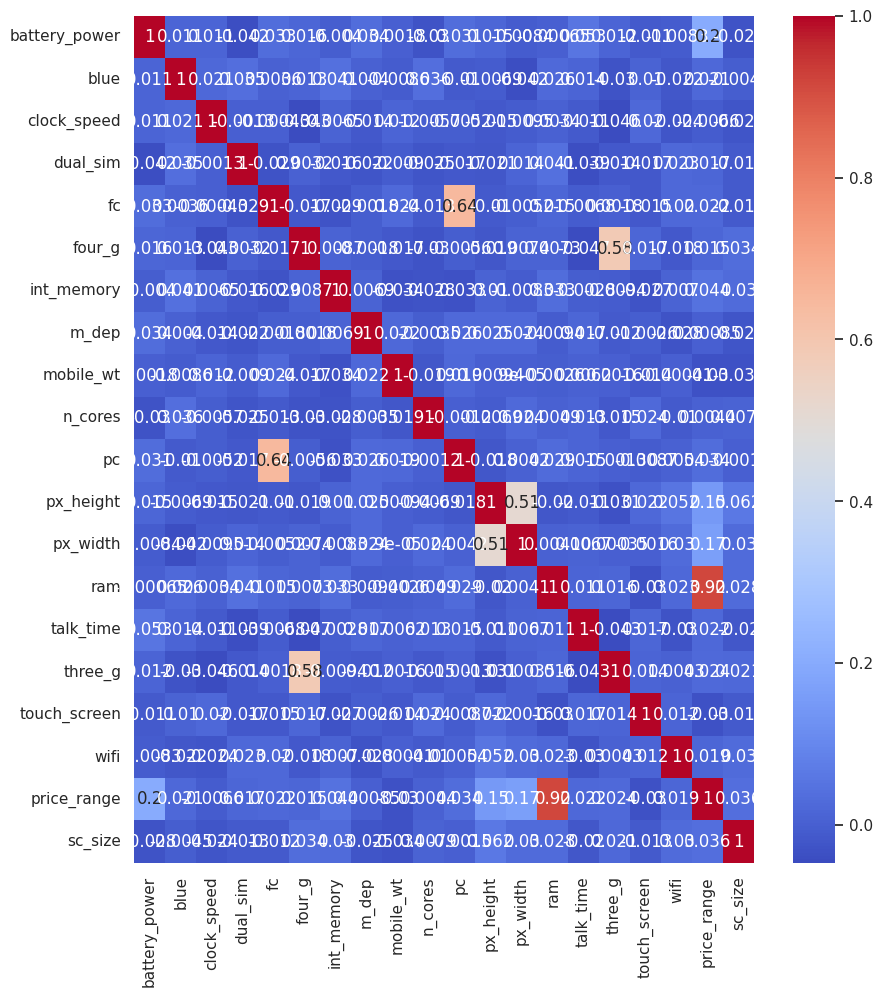

In [ ]:
# Checking for multi-collinearity

correlation = Mobile_data.corr()
plt.figure(figsize = [10, 11])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)


RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.

There is some collinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.



<Axes: >

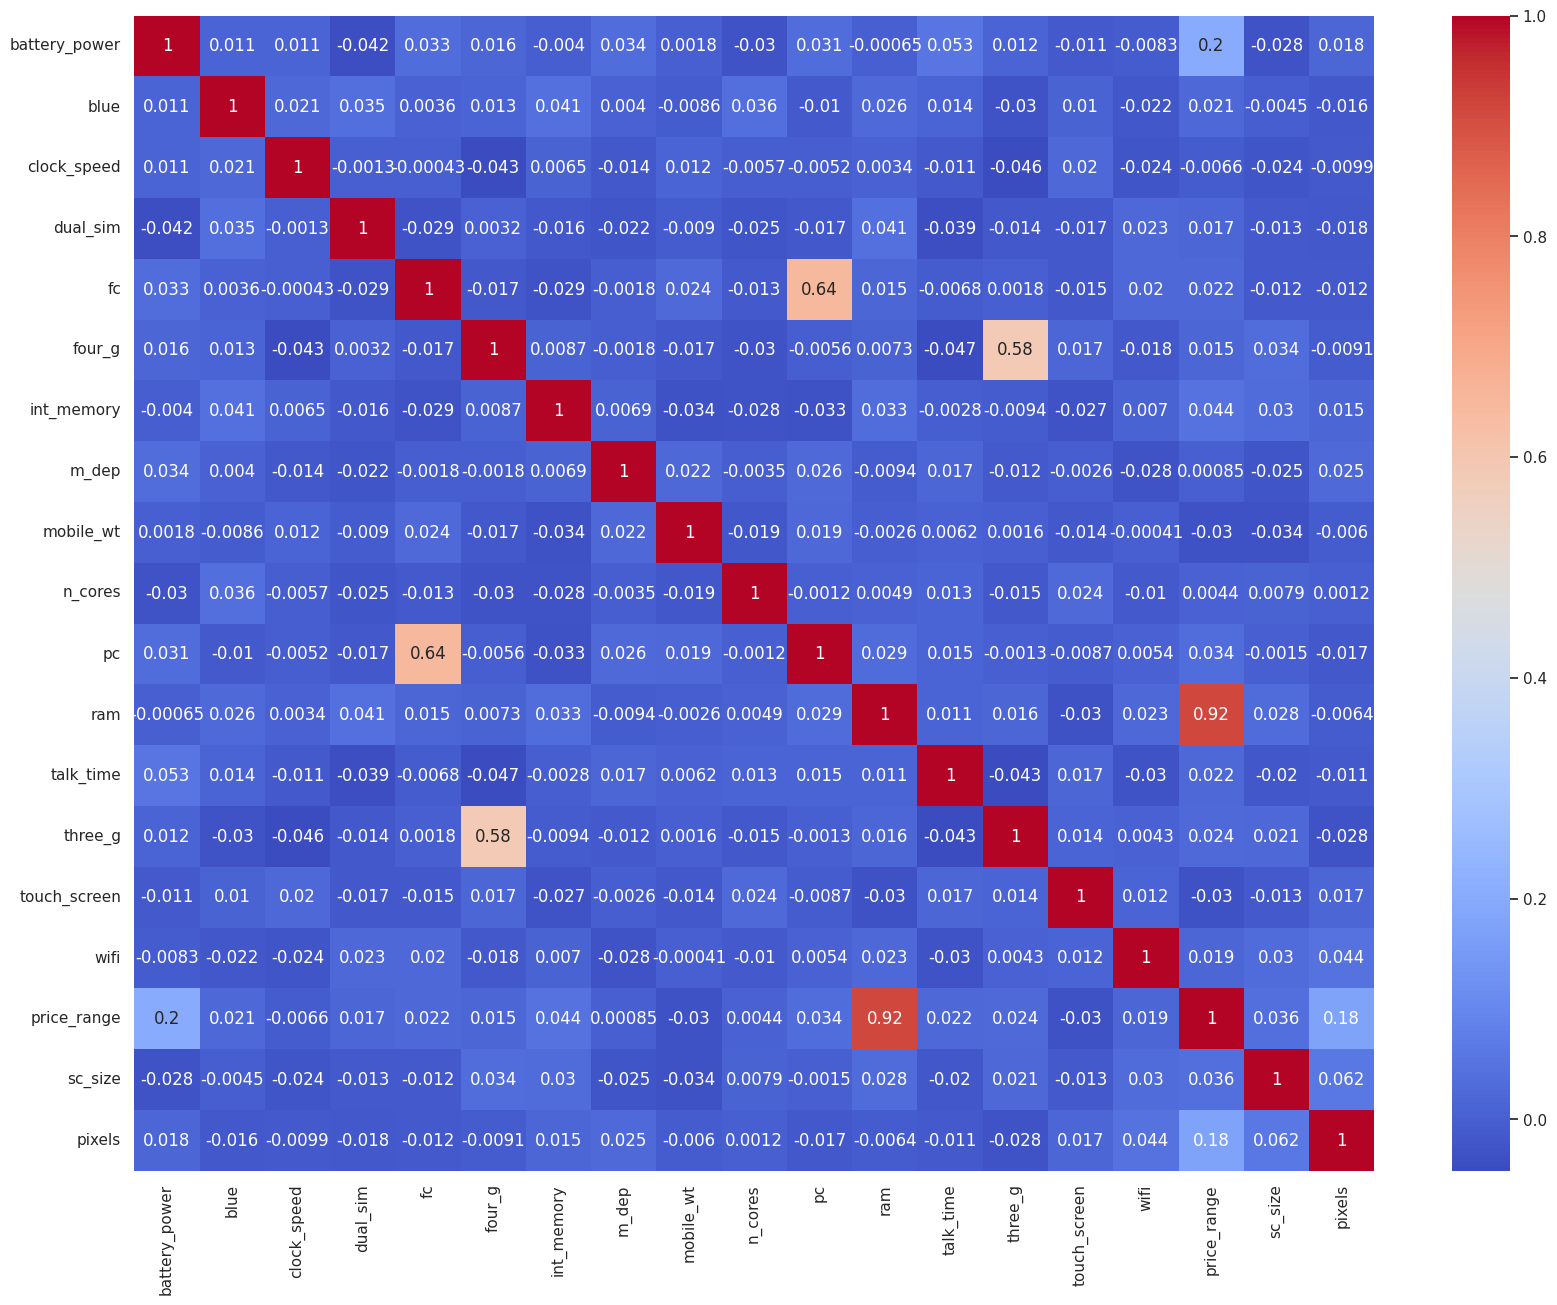

In [ ]:
#  defining new variable for pixels

Mobile_data['pixels'] = Mobile_data['px_height']*Mobile_data['px_width']
# Dropping px_height and px_width

Mobile_data.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

correlation = Mobile_data.corr()
plt.figure(figsize = [20, 15])
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)


In [ ]:
# Defining X and y

X = Mobile_data.drop(['price_range'], axis = 1)
y = Mobile_data['price_range']


In [ ]:
X.shape


(2000, 20)

In [ ]:
y.shape


(2000,)

In [ ]:
# Scaling values of X

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
 

In [ ]:
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)


In [ ]:
X_train.shape


(1600, 18)

In [ ]:
y_train.shape


(1600,)

###Logistic Regression


In [ ]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test
 

In [ ]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))


Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       107
           1       0.86      0.87      0.86        90
           2       0.82      0.82      0.82        92
           3       0.92      0.93      0.92       111

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



[[102   3   0   0]
 [  5  78   8   0]
 [  0   9  75   8]
 [  0   0   9 103]]


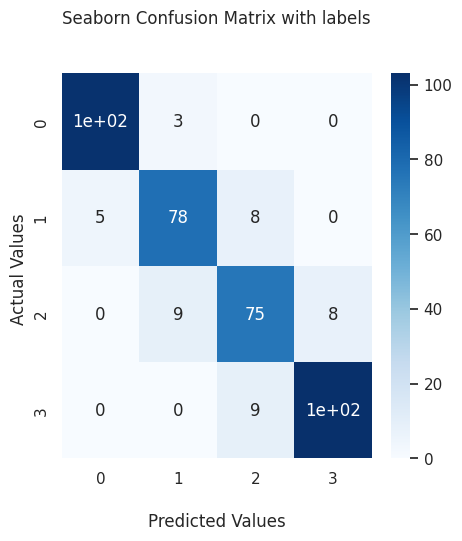

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))


Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       403
           1       0.89      0.89      0.89       408
           2       0.86      0.90      0.88       390
           3       0.96      0.93      0.95       399

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



###Random Forest


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)
    

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score


0.9

In [ ]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score


1.0

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.89      0.88      0.88        91
           2       0.82      0.86      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



[[101   4   0   0]
 [  6  80   5   0]
 [  0   6  79   7]
 [  0   0  12 100]]


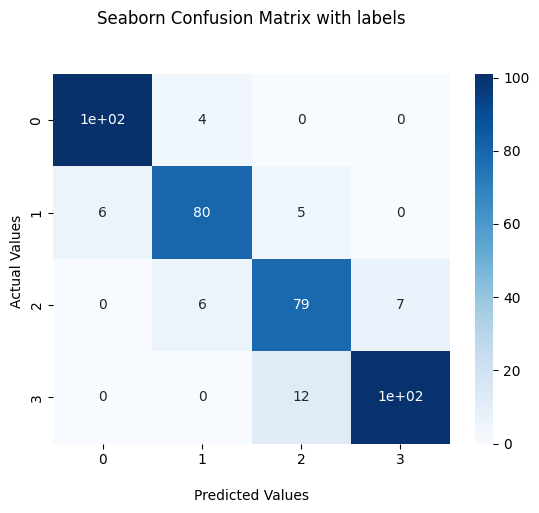

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()


In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()


,Feature,Score
0,ram,0.476206
1,battery_power,0.074242
2,px_width,0.056373
3,px_height,0.056081
4,mobile_wt,0.040733


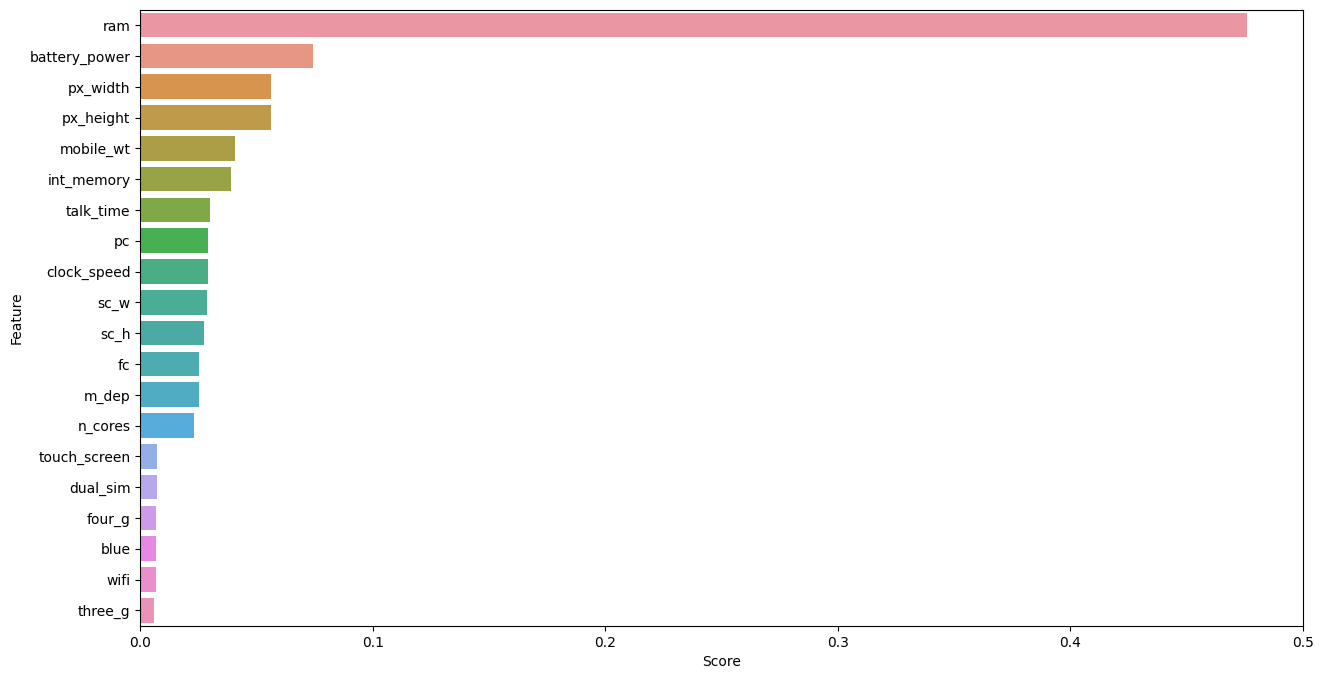

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()


###Hyperparameter tuning for Random Forest



In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
clsr.estimator

RandomForestClassifier()

In [ ]:
clsr.scoring


'accuracy'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [ ]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)


0.88

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.86      0.84      0.85        91
           2       0.79      0.84      0.81        92
           3       0.93      0.88      0.90       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



[[101   4   0   0]
 [  8  76   7   0]
 [  0   8  77   7]
 [  0   0  14  98]]


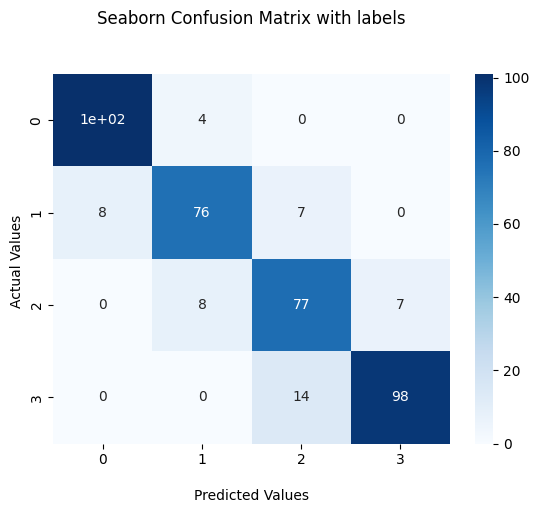

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()
     

In [ ]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)
     

0.9575

In [ ]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       395
           1       0.94      0.93      0.94       409
           2       0.95      0.94      0.94       408
           3       0.98      0.98      0.98       388

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()


,Feature,Score
0,ram,0.665161
1,battery_power,0.073498
2,px_width,0.045613
3,px_height,0.041679
4,mobile_wt,0.024204


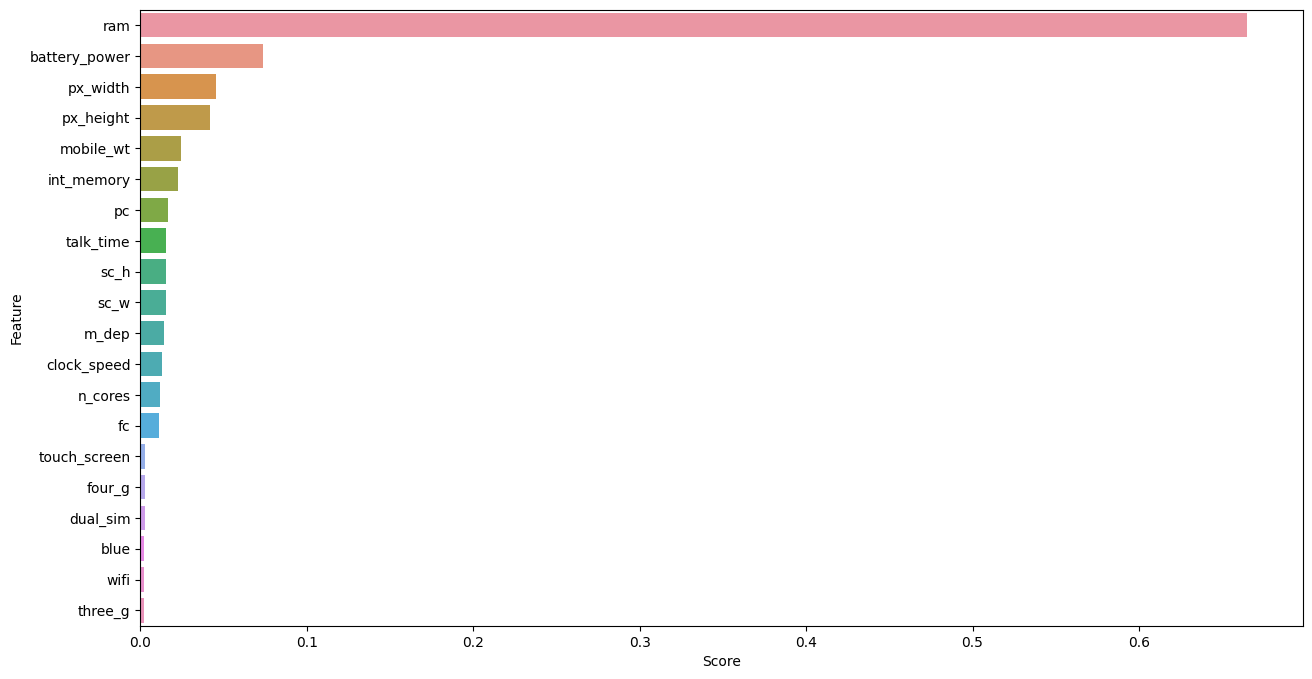

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()


###Decision tree


In [ ]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [ ]:
# Prediction

y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)
     



In [ ]:
accuracy_score(y_test, y_pred_test)


0.8

In [ ]:
# Evaluation metrics for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))
     


Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        97
           1       0.77      0.73      0.75        96
           2       0.73      0.66      0.69       102
           3       0.82      0.88      0.85       105

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



In [ ]:
# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.800 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.819 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.803 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.772 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.794 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
# Prediction

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))
 

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       105
           1       0.75      0.81      0.78        91
           2       0.74      0.73      0.74        92
           3       0.88      0.88      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



[[92 13  0  0]
 [ 7 74 10  0]
 [ 0 12 67 13]
 [ 0  0 13 99]]


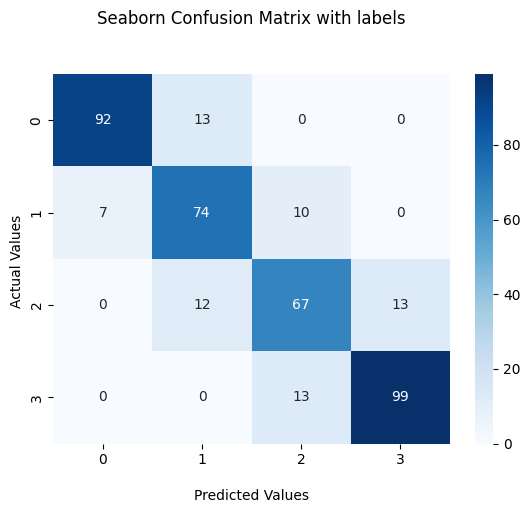

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()
     


In [ ]:
# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))
 

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       395
           1       0.83      0.83      0.83       409
           2       0.80      0.82      0.81       408
           3       0.93      0.89      0.91       388

    accuracy                           0.87      1600
   macro avg       0.87      0.87      0.87      1600
weighted avg       0.87      0.87      0.87      1600



###xgboost


In [ ]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)
 

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       105
           1       0.83      0.95      0.89        91
           2       0.88      0.83      0.85        92
           3       0.94      0.92      0.93       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400



In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)


Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# Cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.863 total time=   1.9s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.869 total time=   0.9s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.859 total time=   0.5s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.834 total time=   1.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None, ...),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [ ]:
# Prediction

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)


Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.92      0.91        91
           2       0.86      0.87      0.86        92
           3       0.94      0.91      0.93       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



[[101   4   0   0]
 [  4  84   3   0]
 [  0   6  80   6]
 [  0   0  10 102]]


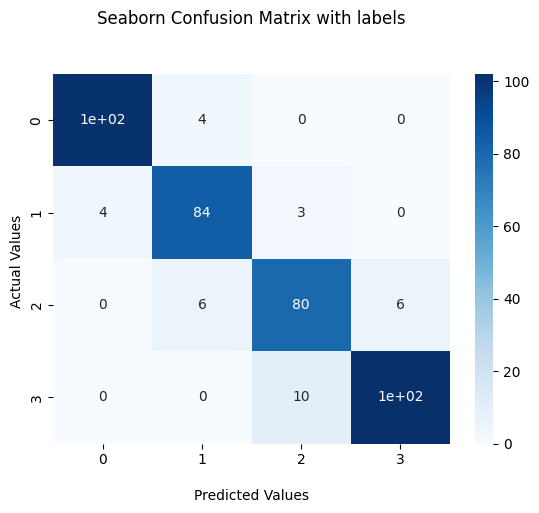

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)
 

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.98      0.98      0.98       409
           2       0.98      0.99      0.99       408
           3       1.00      0.99      0.99       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



# **Conclusion**

1.From EDA we can see that here are mobile phones in 4 price ranges.The number of elements is almost similar.

2.half the devices have Bluetooth, and half don’t

3.there is a gradual increase in battery as the price range increases

4.Ram has continuous increase with price range while moving from Low cost to Very high cost
5.costly phones are lighter

6.RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.

7.form all the above experiments we can conclude that logistic regression and, XGboosting with using hyperparameters we got the best results

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***